# <center>PREDICTION OF HOUSE PRICE OF CALIFORNIA<center> 

<strong>Introduction</strong>
    
- House prices increase every year, so there is a need for a system to predict house prices in the future. House price prediction can help the developer determine the selling price of a house and can help the customer to arrange the right time to purchase a house. There are three factors that influence the price of a house which include physical conditions, concept and location.
    
<strong>The Data:</strong> The data contains information from the 1990 California census. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 14 variables. The dependent variable is median house value.
    
<strong>The Question:</strong> 
- What is the “Median House Value”?
- At which price should the developer determine for the sale of a house?
- Where and when should customers make a decision to purchase a house for a specific purpose (eg. investment, accommodation,...)?


----

## <center>I. Data preparation</center>

### Import libraries

In [2]:
import pandas as pd
import sys
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib

from math import radians, cos, sin, asin, sqrt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sklearn.model_selection as ms

from mpl_toolkits.basemap import Basemap

from PIL import Image
import PIL

import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

### Get and take a look at the data

In [3]:
df = pd.read_csv('District_X_Houses.csv', low_memory = False)
df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568

1) Median House Value: Median house value for households within a block (measured in US Dollars) <br>
2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) ($10k) <br>
3) Median Age: Median age of a house within a block; a lower number is a newer building [years] <br>
4) Total Rooms: Total number of rooms within a block<br>
5) Total Bedrooms: Total number of bedrooms within a block<br>
6) Population: Total number of people residing within a block<br>
7) Households: Total number of households, a group of people residing within a home unit, for a block<br>
8) Latitude: A measure of how far north a house is; a higher value is farther north [°]<br>
9) Longitude: A measure of how far west a house is; a higher value is farther west [°]<br>
10) Distance to coast: Distance to the nearest coast point [m]<br>
11) Distance to Los Angeles: Distance to the center of Los Angeles [m]<br>
12) Distance to San Diego: Distance to the center of San Diego [m]<br>
13) Distance to San Jose: Distance to the center of San Jose [m]<br>
14) Distance to San Francisco: Distance to the center of San Francisco [m]<br>

### Clean the data 

#### Handle missing data

Text(0.925, 0.5, 'Yellow represents missing values.\n\nPurple represents existing values.')

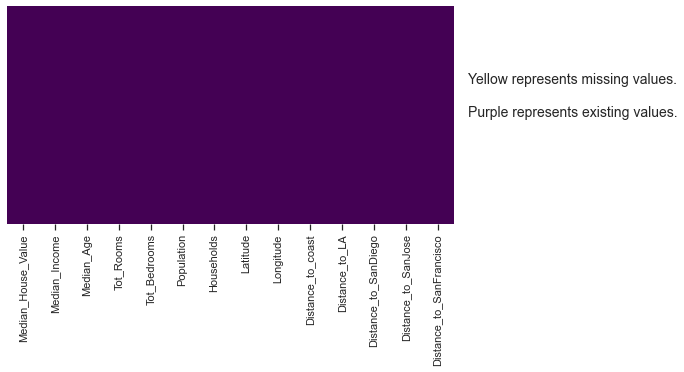

In [6]:
fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax)

plt.gcf().text(0.925, 0.5, 'Yellow represents missing values.\n\nPurple represents existing values.', fontsize=14)

The data has already been cleaned!

#### Correct the measurement unit of each features

- Two columns "Median House Value" and "Median Income" are measured in different types of unit (dollars and 10,000 dollars). Let's change these both to 1,000 dollars to facilitate the calculation.

- The same goes for 5 distance features. Let's measure those in kilometers (km) instead of meters (m).

In [4]:
# Change from 'dollars' to '10k dollars'
df['Median_House_Value'] = df['Median_House_Value'] / 1000
df['Median_Income'] = df['Median_Income'] * 10

# Change from meters to kilometers
for i in ['Distance_to_coast','Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco']:
    df[i] = df[i] / 1000

Let's look at the data after normalization:

In [81]:
df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0               452.6         83.252          41        880           129   
1               358.5         83.014          21       7099          1106   
2               352.1         72.574          52       1467           190   
3               341.3         56.431          52       1274           235   
4               342.2         38.462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23           9.263041   
1        2401        1138     37.86    -122.22          10.225733   
2         496         177     37.85    -122.24           8.259085   
3         558         219     37.85    -122.25           7.768087   
4         565         259     37.85    -122.25           7.768087   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0      556.529158            735.501807            67.432517   
1      554.279850            733.236884            65.049909   
2      554.610717            733.525683            64.867290   
3      555.194266            734.095291            65.287138   
4      555.194266            734.095291            65.287138   

   Distance_to_SanFrancisco  
0                 21.250214  
1                 20.880600  
2                 18.811487  
3                 18.031048  
4                 18.031048

----

## <center>II. Exploratory Data Analysis</center>

### 1. Geographical Distribution (Where?)

Create a table for geographical density distribution of the households in California

In [5]:
latlon_table = df.groupby(['Longitude', 'Latitude'])[['Latitude']].count().rename(columns = {'Latitude': 'Number of blocks'}).reset_index().sort_values(by = 'Number of blocks', ascending = False)

First, let's look at the topography of California.

In [6]:
ax2 = px.density_mapbox(latlon_table, lon = 'Longitude', lat = 'Latitude', 
                        mapbox_style = 'stamen-terrain',
                        zoom = 5, height = 800, width = 800, opacity = 0, 
                        center = go.layout.mapbox.Center(lat = 36.7783, lon = -119.4179))
ax2.update(layout_coloraxis_showscale = False)

- The north of California is mainly the mountainous area, which can explain why there are no existence of big cities there. <br>
- Going southward, the altitude decreases which is more suitable for people to reside, especially towards the coast.

Now, look at how the blocks are distributed.

In [7]:
px.density_mapbox(latlon_table, lon = 'Longitude', lat = 'Latitude', z = 'Number of blocks', 
                        mapbox_style = 'stamen-terrain', 
                        zoom = 5, height = 800, width = 800, radius = 10,
                        center = go.layout.mapbox.Center(lat = 36.7783, lon = -119.4179))

The nearer to the big cities and the coast, the more populated the area is.

### 2. House value

In [8]:
px.scatter_mapbox(df, lon = 'Longitude', lat = 'Latitude',
                  mapbox_style = 'stamen-terrain', color="Median_House_Value",
                  color_continuous_scale=px.colors.diverging.Portland,
                  zoom = 5, height = 800, width = 800,
                  center = go.layout.mapbox.Center(lat = 36.7783, lon = -119.4179))

We can see that the nearer to the big cities and the coast, the higher the house value is.

### 3. House value and Income

<AxesSubplot:xlabel='Median_Income', ylabel='Median_House_Value'>

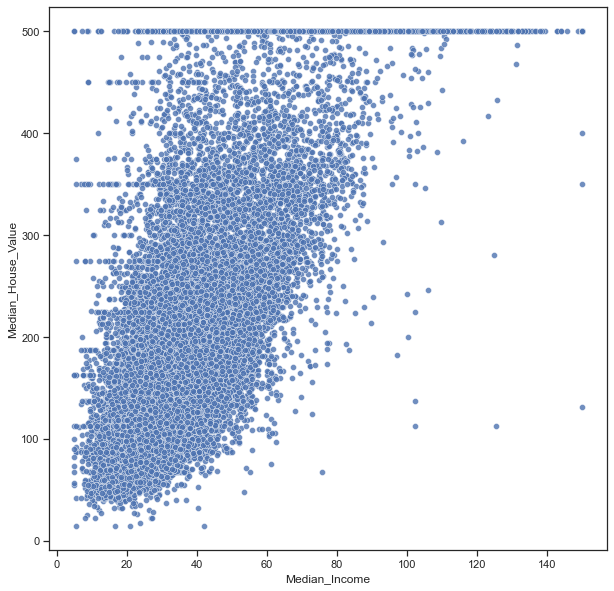

In [8]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = 'Median_Income', y = 'Median_House_Value', alpha = 0.8)

It can be seen that the income of a person and the house value of the block they live in is highly positively correlated.


### 4. House Age and Price

Create a table of age group and information related to house selection such as value, population, number of bedrooms.

In [9]:
df['age_bin'] = np.where(df['Median_Age'] <= 10, '0 - 10',
                         np.where((df['Median_Age'] > 10) & (df['Median_Age'] <= 20), '10 - 20',
                                  np.where((df['Median_Age'] > 20) & (df['Median_Age'] <= 30), '20 - 30',
                                           np.where((df['Median_Age'] > 30) & (df['Median_Age'] <= 40), '30 - 40',
                                                    np.where((df['Median_Age'] > 40) & (df['Median_Age'] <= 50), '40 - 50', '50 - 52')))))

age_value = df[['age_bin','Median_House_Value',
                'Households','Population',
                'Tot_Rooms', 'Tot_Bedrooms']
              ].groupby('age_bin').agg(count = ('age_bin', 'count'), 
                                       mean = ('Median_House_Value', 'mean'), 
                                       std = ('Median_House_Value','std'), 
                                       Households = ('Households', 'sum'), 
                                       Population = ('Population', 'sum'),
                                       Rooms = ('Tot_Rooms', 'sum'),
                                       Bedrooms = ('Tot_Bedrooms', 'sum')
                                      ).rename(columns = {'count': 'Number of Blocks', 
                                                          'mean': 'House Value Average', 
                                                          'std': 'House Value Standard Deviation'
                                                         }).reset_index().sort_values(by = 'age_bin', ascending = False)
age_value['pop/hh'] = age_value.Population / age_value.Households
age_value['r/hh'] = age_value.Rooms / age_value.Households
age_value['br/hh'] = age_value.Bedrooms / age_value.Households

Create a line column combo chart based on the table having just been created above

In [10]:
fig = make_subplots(specs = [[{'secondary_y': True}]])
fig.add_trace(go.Bar(x = age_value['age_bin'], y = age_value['Number of Blocks'], name = 'Number of Blocks', text = age_value['Number of Blocks']), secondary_y = False)
fig.add_trace(go.Scatter(x = age_value['age_bin'], y = age_value['House Value Average'], name = 'House Value on Average (k$)'), secondary_y = True)

fig.update_layout(title_text = 'House Age Distribution and House Value')
fig.update_xaxes(title_text = 'Median House Age')
fig.update_yaxes(title_text = 'Number of Blocks', secondary_y = False)
fig.update_yaxes(title_text = 'House Value on Average (k$)', secondary_y = True)
fig.add_annotation(
    text = ("Number of blocks: {:,}<br><br>Average House Price: ${:,}<br><br>Population: {:,}<br><br>HH:Popu:Rooms:Bedrooms<br> 1 \n: {}: {}  : {}".format(age_value['Number of Blocks'].sum(), 
                                                                                                                                      int(age_value['House Value Average'].mean() * 1000),
                                                                                                                                      age_value['Population'].sum(),
                                                                                                                                      round(age_value['pop/hh'].mean(),2),
                                                                                                                                      round(age_value['r/hh'].mean(),2),
                                                                                                                                      round(age_value['br/hh'].mean(),2)))
    , showarrow=False
    , x = 1.035
    , y = 0.3
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=14, color="black")
    , align="left"
    ,)

fig.show()

It can be seen that the blocks with the 50-to-52-year-old houses having the lowest number of houses but haviing the highest average house value. <br>
To find out, let's look at the map below for the house older than 50 years old.

- **Houses which are older than 50 years old.**

In [11]:
px.scatter_mapbox(df[(df['Median_Age'] >= 50)], lon = 'Longitude', lat = 'Latitude',
                  mapbox_style = 'stamen-terrain', color="Median_House_Value",
                  color_continuous_scale=px.colors.diverging.Portland,
                  zoom = 5, height = 800, width = 800,
                  center = go.layout.mapbox.Center(lat = 36.7783, lon = -119.4179))

The houses over 50 years old are located at prime locations such as near the coast or extremely close to the city centers, not only big ones but also smaller ones.

#### Next, create and the chart table for each place with distance condition

In [11]:
destination = ['Distance_to_coast','Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco']
distance = [0, 20, 50, 100]
for i in destination:
    name = i.split('_')[2]
    for d in distance:
        if d != 0:
            globals()['%s_%s' % (name, d)] = df[['age_bin','Median_House_Value',
                                                 'Households','Population',
                                                 'Tot_Rooms', 'Tot_Bedrooms']
                                               ][(df[i] <= d) & (df[i] > distance[distance.index(d)-1])].groupby('age_bin').agg(count = ('age_bin', 'count'), 
                                                                                                                            mean = ('Median_House_Value', 'mean'), 
                                                                                                                            std = ('Median_House_Value','std'), 
                                                                                                                            Households = ('Households', 'sum'), 
                                                                                                                            Population = ('Population', 'sum'),
                                                                                                                            Rooms = ('Tot_Rooms', 'sum'),
                                                                                                                            Bedrooms = ('Tot_Bedrooms', 'sum')
                                                                                                                           ).rename(columns = {'count': 'Number of Blocks', 
                                                                                                                                               'mean': 'House Value Average', 
                                                                                                                                               'std': 'House Value Standard Deviation'
                                                                                                                                              }).reset_index().sort_values(by = 'age_bin', ascending = False)
            globals()['%s_%s' % (name, d)]['pop/hh'] = globals()['%s_%s' % (name, d)].Population / globals()['%s_%s' % (name, d)].Households
            globals()['%s_%s' % (name, d)]['r/hh'] = globals()['%s_%s' % (name, d)].Rooms / globals()['%s_%s' % (name, d)].Households
            globals()['%s_%s' % (name, d)]['br/hh'] = globals()['%s_%s' % (name, d)].Bedrooms / globals()['%s_%s' % (name, d)].Households
            globals()['%s%s' % (name, d)] = make_subplots(specs = [[{'secondary_y': True}]])
            globals()['%s%s' % (name, d)].add_trace(go.Bar(x = globals()['%s_%s' % (name, d)]['age_bin'], y = globals()['%s_%s' % (name, d)]['Number of Blocks'], name = 'Number of Blocks', text = globals()['%s_%s' % (name, d)]['Number of Blocks']), secondary_y = False)
            globals()['%s%s' % (name, d)].add_trace(go.Scatter(x = globals()['%s_%s' % (name, d)]['age_bin'], y = globals()['%s_%s' % (name, d)]['House Value Average'], name = 'House Value on Average (k$)'), secondary_y = True)
            globals()['%s%s' % (name, d)].update_layout(showlegend = False)
            globals()['%s%s' % (name, d)].update_yaxes(range=[0, 5200], secondary_y = False)
            globals()['%s%s' % (name, d)].update_yaxes(range=[50, 360], secondary_y = True)
            
            globals()['%s%s' % (name, d)].add_annotation(
                text = ("Blocks:<br>{:,}<br><br>AVG Price:<br>${:,}<br><br>Population:<br>{:,}<br><br>H:P:R:Br<br>1:{}:{}:{}".format(globals()['%s_%s' % (name, d)]['Number of Blocks'].sum(), 
                                                                                                                                              int(globals()['%s_%s' % (name, d)]['House Value Average'].mean() * 1000),
                                                                                                                                              globals()['%s_%s' % (name, d)]['Population'].sum(),
                                                                                                                                              round(globals()['%s_%s' % (name, d)]['pop/hh'].mean(),1),
                                                                                                                                              round(globals()['%s_%s' % (name, d)]['r/hh'].mean(),1),
                                                                                                                                              round(globals()['%s_%s' % (name, d)]['br/hh'].mean(),1)))
                , showarrow=False
                , x = 1
                , y = 0.3
                , xref='paper'
                , yref='paper' 
                , xanchor='left'
                , yanchor='bottom'
                , xshift=-1
                , yshift=-5
                , font=dict(size=12, color="black")
                , align="left"
                ,)
            
            globals()['%s%s' % (name, d)].write_image('15/{}{}.png'.format(name,d))

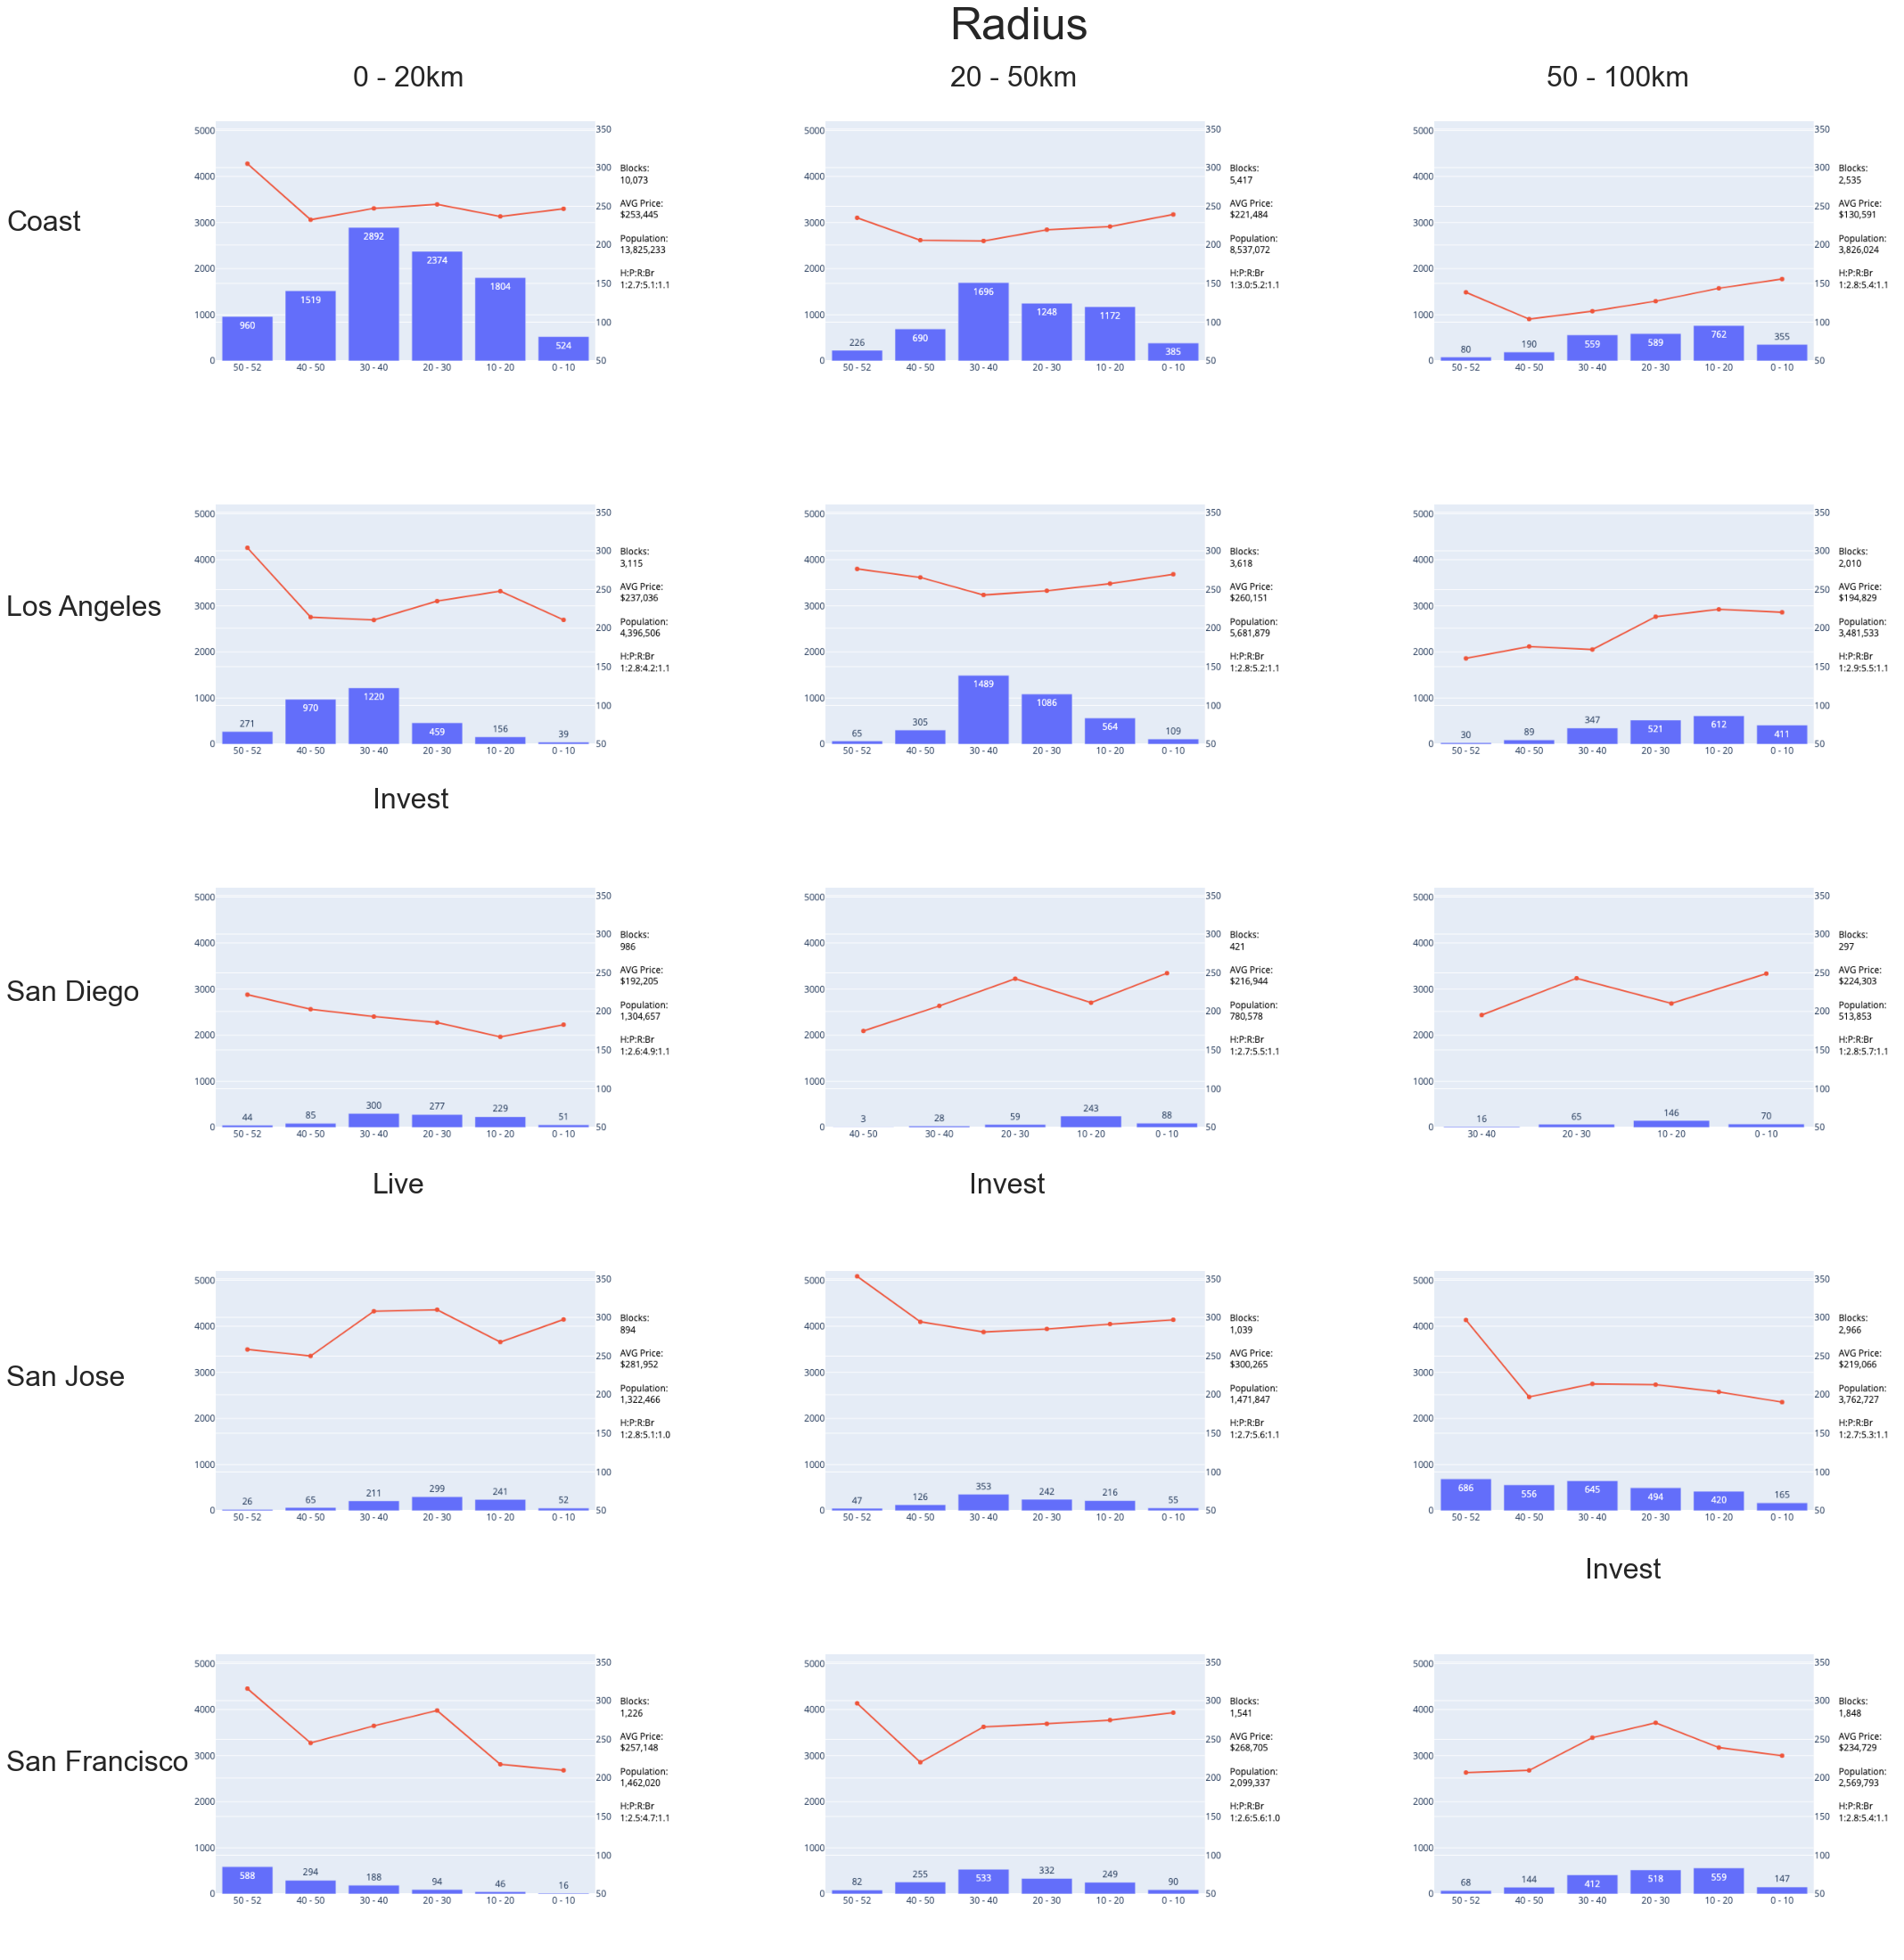

In [22]:
f, axes = plt.subplots(5, 3, figsize = (30, 30))
for x in range(1,4):
    for y in range(5):
        axes[y,x-1].imshow(Image.open('15/{}{}.png'.format(destination[y].split('_')[2], distance[x])))
        axes[y,x-1].axis('off')

plt.tight_layout()
plt.gcf().text(0.46, 1, 'Radius', fontsize=50)
plt.gcf().text(0.15, 0.975, '0 - 20km', fontsize=32)
plt.gcf().text(0.46, 0.975, '20 - 50km', fontsize=32)
plt.gcf().text(0.77, 0.975, '50 - 100km', fontsize=32)

# plt.gcf().text(0.13, 0.77, 'Near City Center', fontsize=28)
# plt.gcf().text(0.46, 0.77, 'Near Coast', fontsize=28)

plt.gcf().text(-0.03, 0.9, 'Coast', fontsize=32)
plt.gcf().text(-0.03, 0.7, 'Los Angeles', fontsize=32)
plt.gcf().text(-0.03, 0.5, 'San Diego', fontsize=32)
plt.gcf().text(-0.03, 0.3, 'San Jose', fontsize=32)
plt.gcf().text(-0.03, 0.1, 'San Francisco', fontsize=32)

plt.gcf().text(0.16, 0.6, 'Invest', fontsize=32)
plt.gcf().text(0.16, 0.4, 'Live', fontsize=32)
plt.gcf().text(0.47, 0.4, 'Invest', fontsize=32)
plt.gcf().text(0.79, 0.2, 'Invest', fontsize=32)

plt.show()

It can be seen that there are areas suiting for investing and living if someone has the demand.<br><br>
<strong>Invest</strong>
- <strong>Buy house within 20km radius to Los Angeles:</strong> High rate of population over rooms, price is not too high --> high demand. <br>
- <strong>Buy house within 20km - 50km radius to San Diego:</strong> High price and near coast. <br>
- <strong>Buy house within 50km - 100km radius to San Jose</strong> Cheap but far from coast and cities. <br>

<strong>Live</strong>
- <strong>Live in a house within 20km radius to San Diego:</strong> Cheap, near city center to work.

----

## <center>III. Model Development</center>

### Correlation

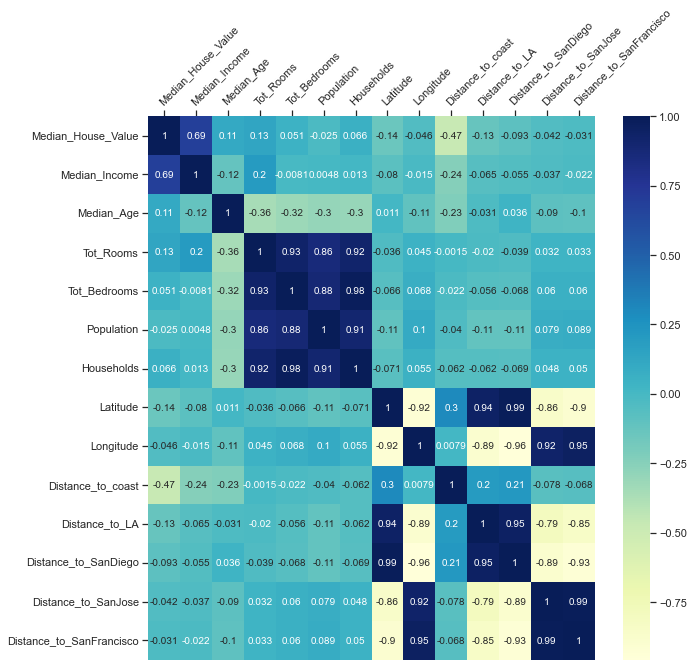

In [13]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
#Set axis to top
ax.xaxis.tick_top()
#Set x axis lable to top
ax.xaxis.set_label_position('top') 

ax.tick_params(axis='x', labelrotation = 45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
plt.show()

- `Median House Value` and `Median Income` are highly correlated, however theoretically and practically income has some impact on house value, therefore `Median Income` must be included in the model.<br><br>
- `Total Rooms`, `Total Bedrooms`, `Population`, `Households` are extremely highly correlated, therefore we need to do trial and error to choose the best features for our model.<br><br>
- `The distance variables` are also extremely highly correlated, which we will also apply trial and error to filter out the best features.

### 1. Preparing data for Machine Learning Algorithms

**Transform latitude and logitude columns in dataframe into the distance to the center of California**

In [20]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

df['Lat_Cali'] = 36.7783
df['Long_Cali'] = -119.4179
df['Distance_to_CaliCenter'] = \
    haversine(df['Latitude'], df['Longitude'],df['Lat_Cali'], df['Long_Cali'])

In [21]:
df_an = df.drop(['Latitude','Longitude','age_bin','Lat_Cali','Long_Cali'], axis = 1)
df_an

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                   452.6         83.252          41        880           129   
1                   358.5         83.014          21       7099          1106   
2                   352.1         72.574          52       1467           190   
3                   341.3         56.431          52       1274           235   
4                   342.2         38.462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635                78.1         15.603          25       1665           374   
20636                77.1         25.568          18        697           150   
20637                92.3         17.000          17       2254           485   
20638                84.7         18.672          18       1860           409   
20639                89.4         23.886          16       2785           616   

       Population  Households  Distance_to_coast  Distance_to_LA  \
0             322         126           9.263041      556.529158   
1            2401        1138          10.225733      554.279850   
2             496         177           8.259085      554.610717   
3             558         219           7.768087      555.194266   
4             565         259           7.768087      555.194266   
...           ...         ...                ...             ...   
20635         845         330         162.031481      654.530186   
20636         356         114         160.445434      659.747068   
20637        1007         433         153.754341      654.042214   
20638         741         349         152.005022      657.698008   
20639        1387         530         146.866197      648.723337   

       Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  \
0                735.501807            67.432517                 21.250214   
1                733.236884            65.049909                 20.880600   
2                733.525683            64.867290                 18.811487   
3                734.095291            65.287138                 18.031048   
4                734.095291            65.287138                 18.031048   
...                     ...                  ...                       ...   
20635            830.631543           248.510058                222.619890   
20636            836.245915           246.849889                218.314425   
20637            830.699573           240.172220                212.097936   
20638            834.672462           238.193866                207.923199   
20639            825.569179           233.282769                205.473377   

       Distance_to_CaliCenter  
0                  277.163727  
1                  275.422456  
2                  276.548489  
3                  277.346671  
4                  277.346671  
...                       ...  
20635              334.108108  
20636              339.812678  
20637              334.349455  
20638              338.561430  
20639              329.356598  

[20640 rows x 13 columns]

<strong> The skewness of the data </strong>

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level f

IndexError: single positional indexer is out-of-bounds

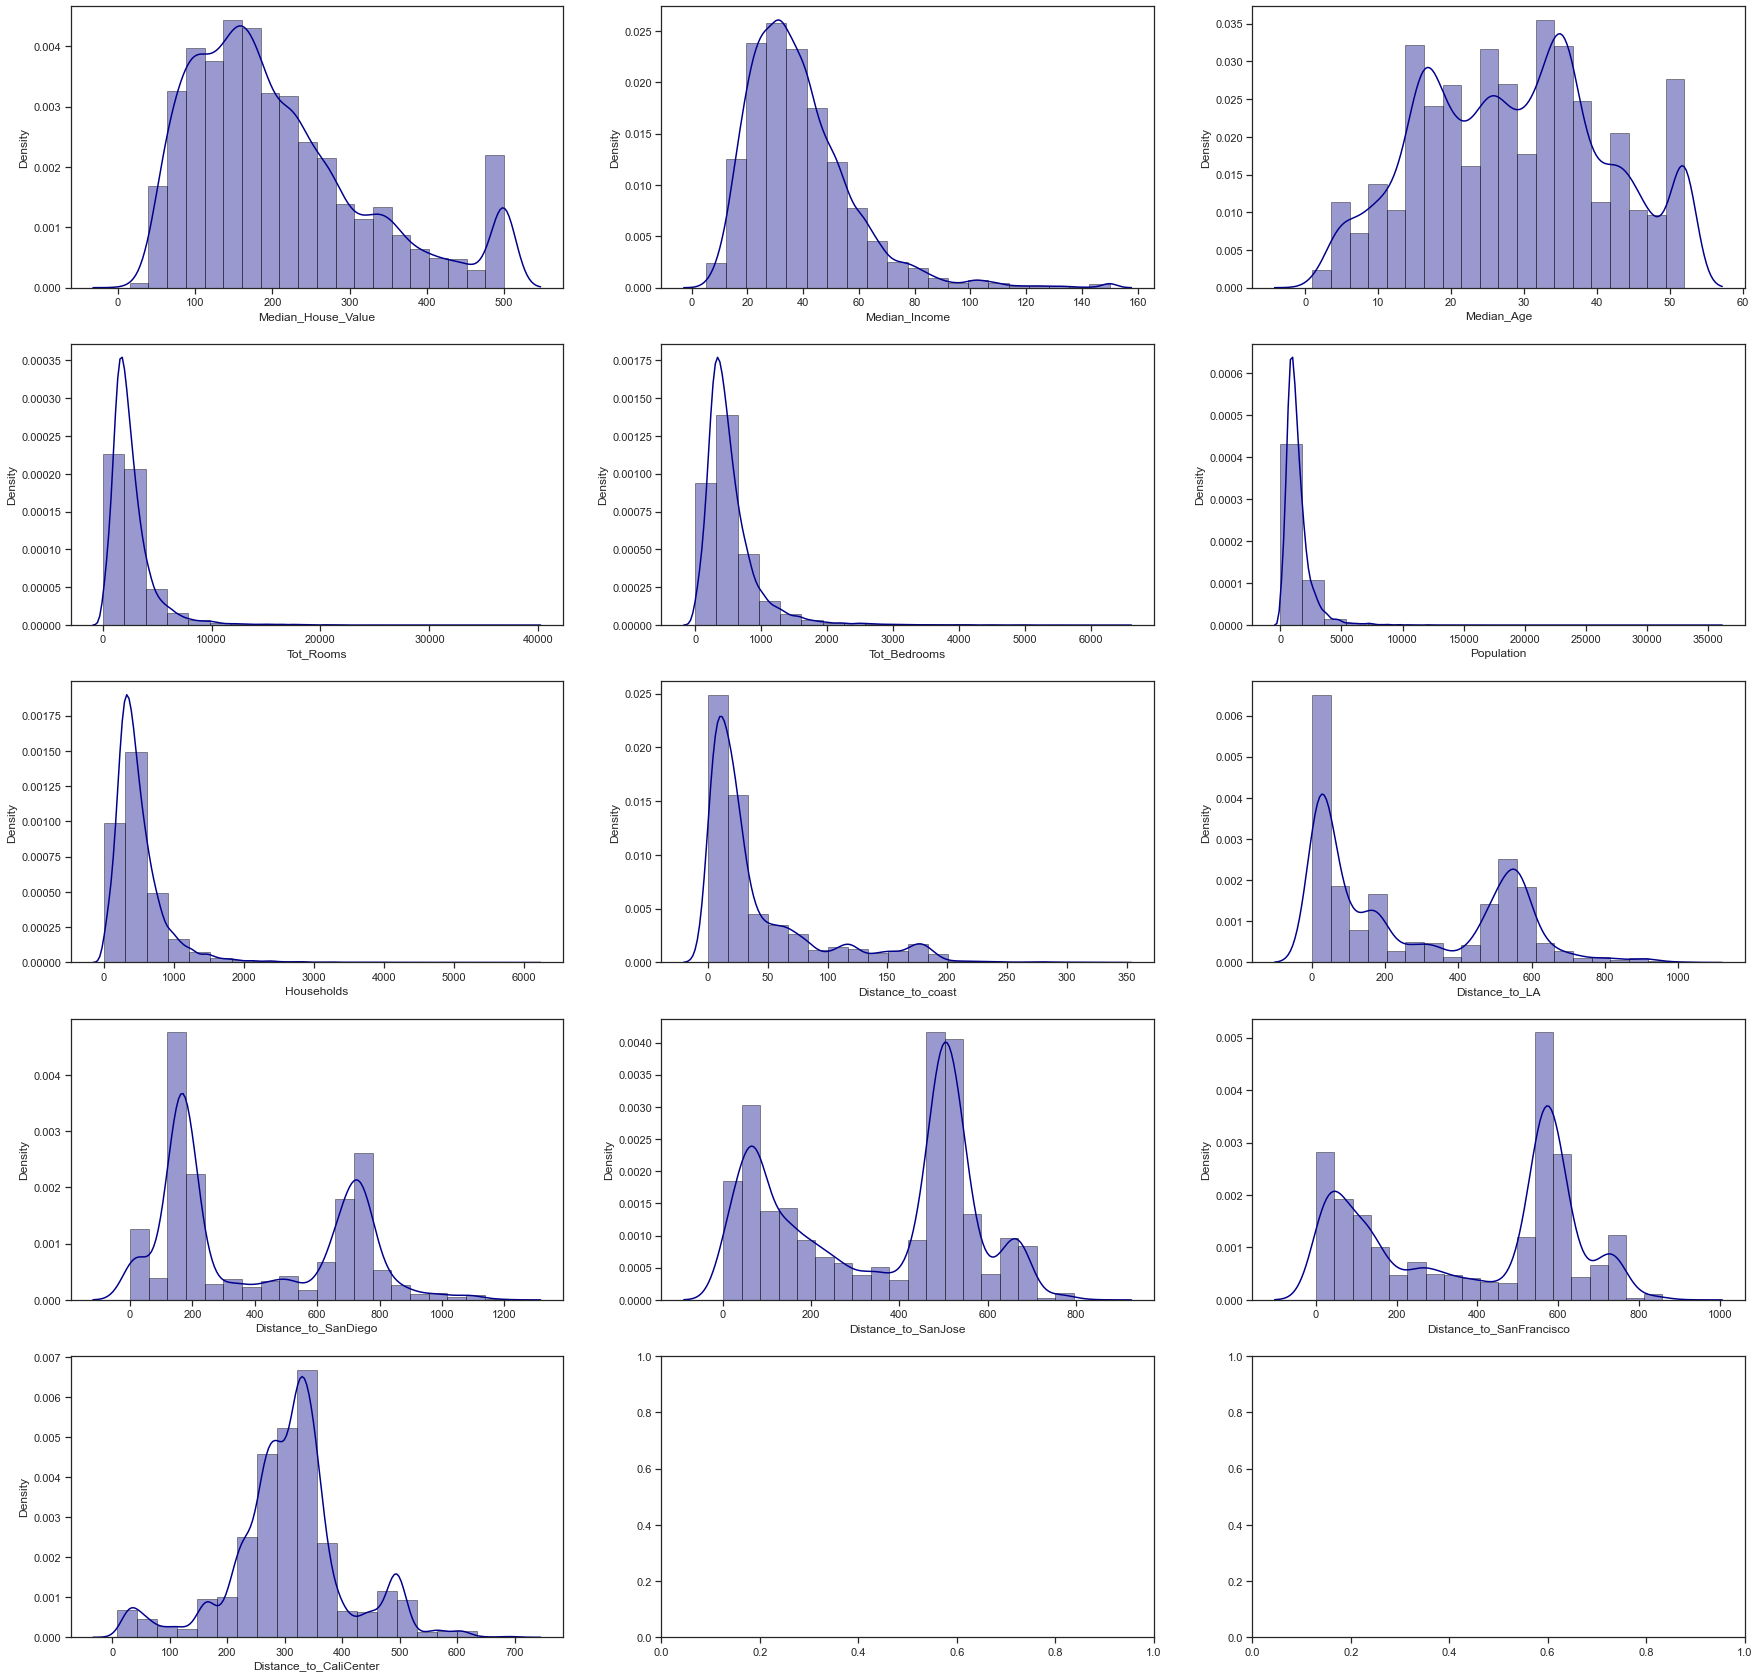

In [256]:
f, axes = plt.subplots(5, 3, figsize = (30, 30))
for x in range(5):
    for y in range(3):
        sns.distplot(df_an.iloc[:, y + 3*x], hist = True, kde = True, bins = 20, 
                    color = 'darkblue', hist_kws = {'edgecolor': 'black'}, ax = axes[x,y])

In [257]:
df_an.skew()

Median_House_Value          0.977763
Median_Income               1.646657
Median_Age                  0.060331
Tot_Rooms                   4.147343
Tot_Bedrooms                3.453073
Population                  4.935858
Households                  3.410438
Distance_to_coast           1.938709
Distance_to_LA              0.466536
Distance_to_SanDiego        0.384936
Distance_to_SanJose        -0.223069
Distance_to_SanFrancisco   -0.263499
Distance_to_CaliCenter     -0.133370
dtype: float64

Most variables are skewed, therefore we use BoxCox Transformation to transform the skewed data.

**Box Cox Transformation**

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level f

IndexError: single positional indexer is out-of-bounds

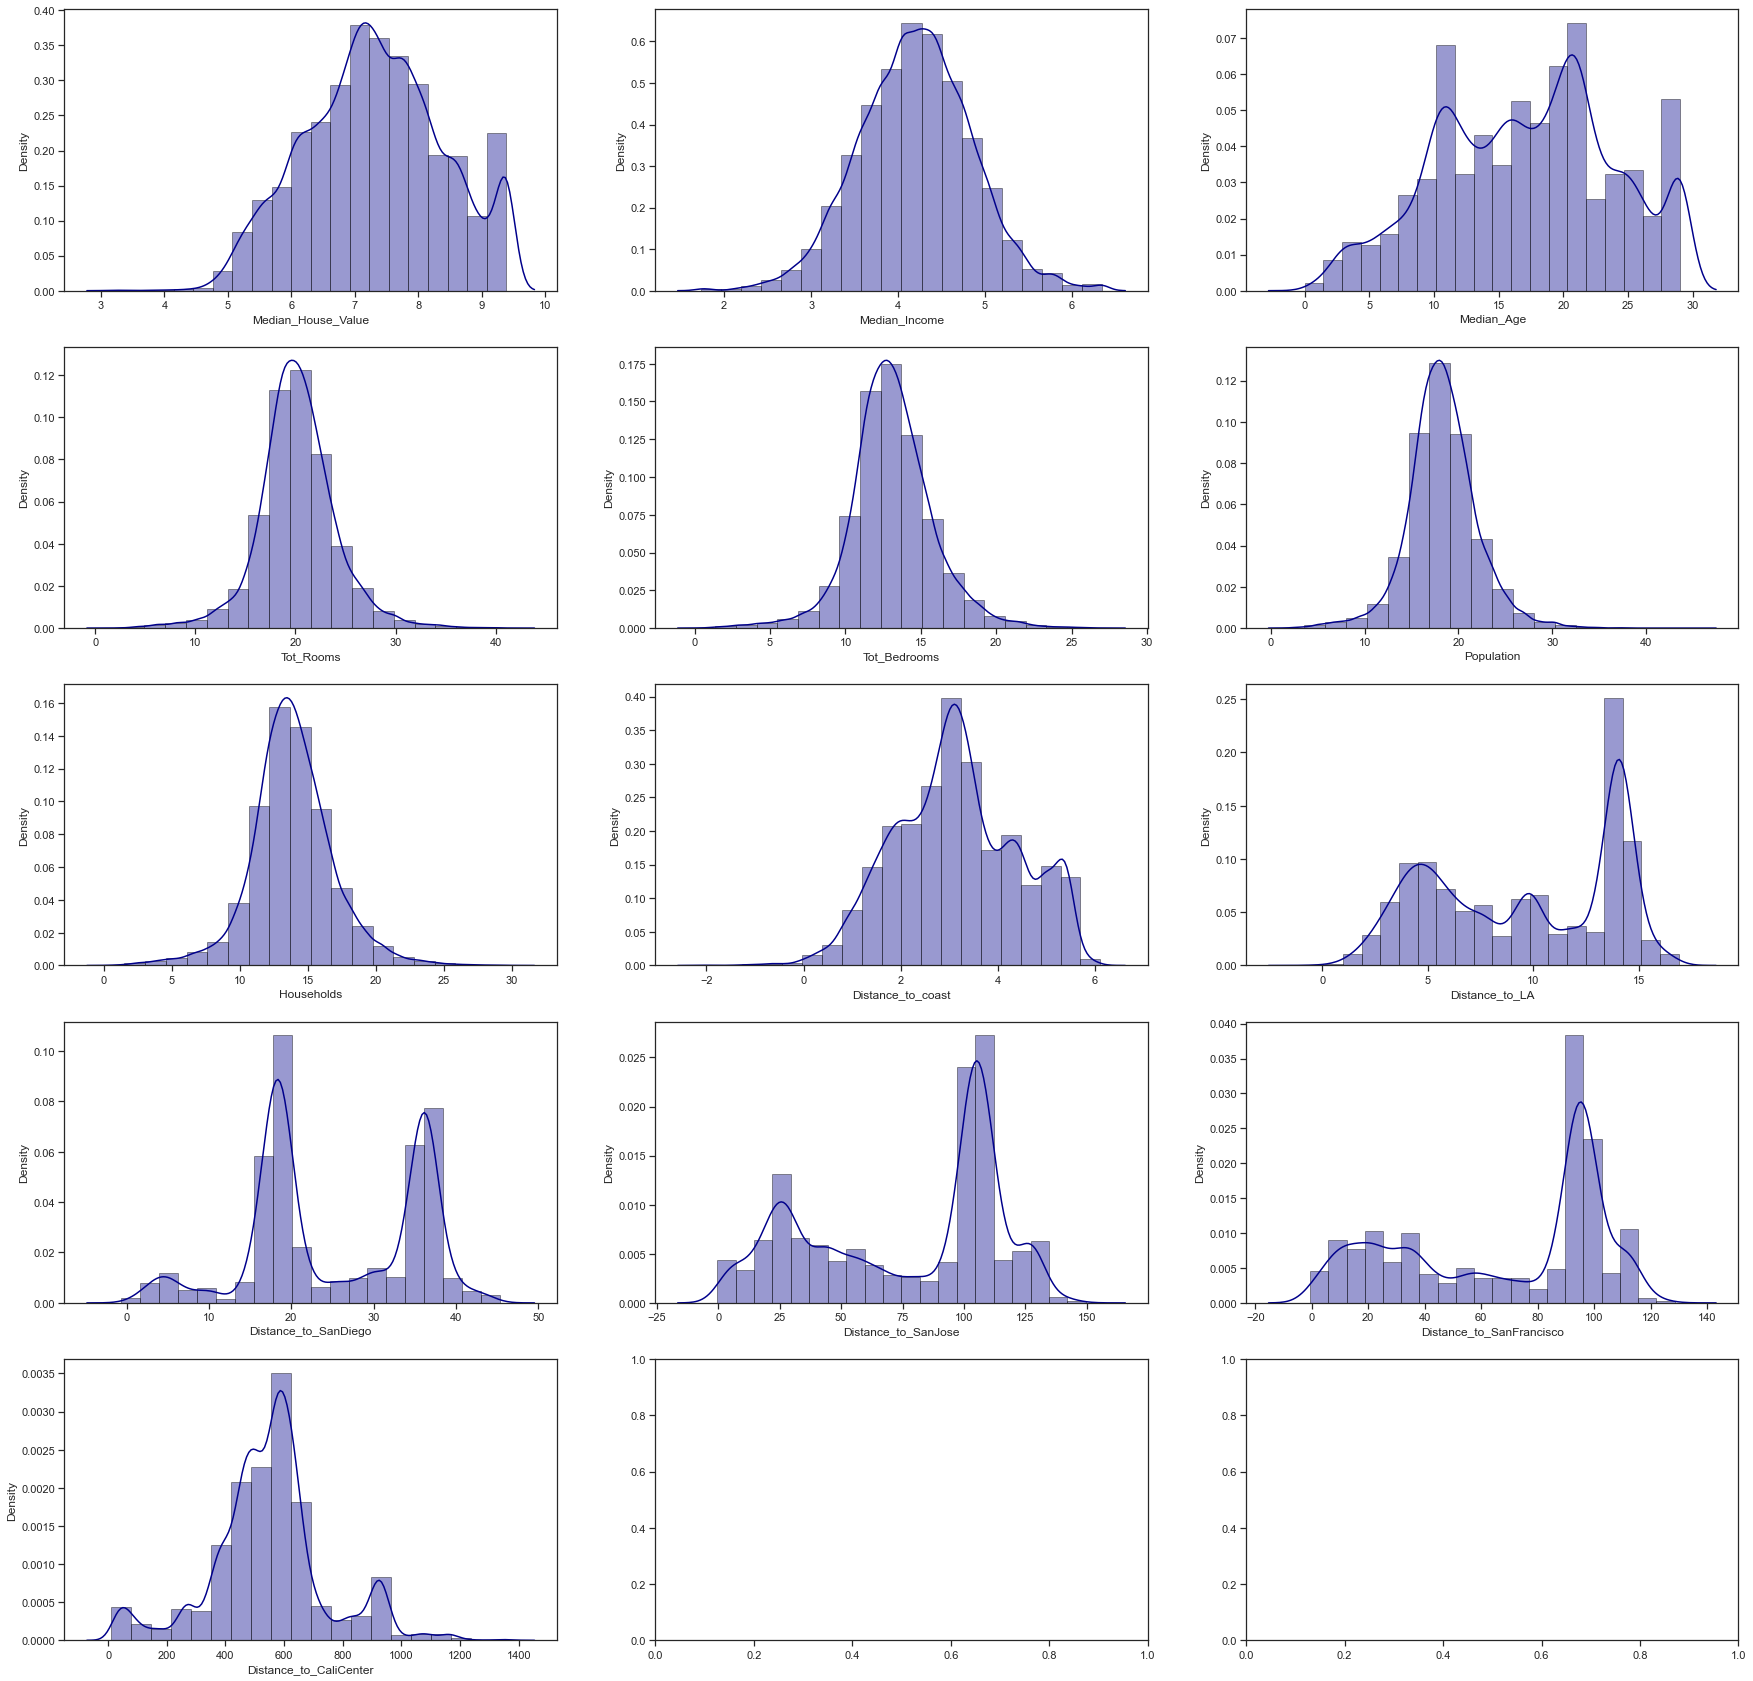

In [266]:
from scipy import stats

f, axes = plt.subplots(5, 3, figsize = (30, 30))
for x in range(5):
    for y in range(3):
        fitted_data, fitted_lambda = stats.boxcox(df_an.iloc[:, y + 3*x])
        p = sns.distplot(fitted_data, hist = True, kde = True, bins = 20, 
                    color = 'darkblue', hist_kws = {'edgecolor': 'black'}, ax = axes[x,y])
        p.set_xlabel(df_an.columns[y + 3*x])

**Skewness after performing BoxCoxTransformation**

In [267]:
for i in df_an.columns:
    fitted_data, fitted_lambda = stats.boxcox(df_an.loc[:, i])
    print(i, pd.DataFrame(fitted_data).skew())

Median_House_Value 0   -0.012149
dtype: float64
Median_Income 0    0.004876
dtype: float64
Median_Age 0   -0.121574
dtype: float64
Tot_Rooms 0    0.123294
dtype: float64
Tot_Bedrooms 0    0.111566
dtype: float64
Population 0    0.113081
dtype: float64
Households 0    0.115953
dtype: float64
Distance_to_coast 0   -0.002914
dtype: float64
Distance_to_LA 0   -0.169903
dtype: float64
Distance_to_SanDiego 0   -0.144201
dtype: float64
Distance_to_SanJose 0   -0.421328
dtype: float64
Distance_to_SanFrancisco 0   -0.475898
dtype: float64
Distance_to_CaliCenter 0    0.097902
dtype: float64


The data is much more normally distributed, let's head to model testing.

**Final Data for analysis**

In [22]:
from scipy import stats

df_ml = {}
for i in df_an.columns:
    fitted_data, fitted_lambda = stats.boxcox(df_an.loc[:, i])
    df_ml[i] = fitted_data.tolist()
df_ml = pd.DataFrame(df_ml)
df_ml

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                9.173259       5.442032   23.723216  15.706729      8.803132   
1                8.680652       5.437755   13.286954  27.556487     17.015652   
2                8.643174       5.238172   29.017459  18.123797     10.006475   
3                8.578556       4.871062   29.017459  17.429179     10.712866   
4                8.584009       4.327580   29.017459  18.647499     11.320973   
...                   ...            ...         ...        ...           ...   
20635            5.789929       3.120779   15.488038  18.765939     12.379533   
20636            5.767752       3.769127   11.583480  14.691480      9.259461   
20637            6.080662       3.231272   11.003934  20.376984     13.390315   
20638            5.930360       3.353143   11.583480  19.342577     12.720830   
20639            6.024635       3.678057   10.417849  21.567820     14.373726   

       Population  Households  Distance_to_coast  Distance_to_LA  \
0       12.308116    9.264721           2.269121       14.156525   
1       22.335341   18.799348           2.371935       14.139405   
2       14.082654   10.423372           2.150050       14.141927   
3       14.598635   11.199954           2.086531       14.146372   
4       14.654092   11.840977           2.086531       14.146372   
...           ...         ...                ...             ...   
20635   16.535104   12.814452           5.316636       14.855329   
20636   12.704453    8.941507           5.305902       14.890201   
20637   17.412274   13.976932           5.259441       14.852057   
20638   15.901621   13.047725           5.246966       14.876530   
20639   19.110083   14.893569           5.209487       14.816261   

       Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  \
0                 36.431863            25.083771                  9.725268   
1                 36.381131            24.432788                  9.597127   
2                 36.387605            24.382591                  8.864614   
3                 36.400369            24.497932                  8.581122   
4                 36.400369            24.497932                  8.581122   
...                     ...                  ...                       ...   
20635             38.486478            63.859506                 50.592733   
20636             38.603397            63.557902                 49.932806   
20637             38.487897            62.338366                 48.971922   
20638             38.570676            61.975054                 48.321133   
20639             38.380663            61.069102                 47.937122   

       Distance_to_CaliCenter  
0                  483.220469  
1                  479.817862  
2                  482.017944  
3                  483.578108  
4                  483.578108  
...                       ...  
20635              595.824603  
20636              607.238705  
20637              596.307039  
20638              604.733152  
20639              586.335145  

[20640 rows x 13 columns]

### 2. Model

**Choosing features**

In [23]:
X = df_ml.drop('Median_House_Value', axis = 1)
Y = df_ml['Median_House_Value']

**Test Data**

In [24]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

**Training and Validation Data**

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = (1/9), random_state = 42)

#### 2.1. Ridge Regression

**Finding optimal alpha**

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params_grid = {'alpha': [0.001,0.01,0.1,1,10,100]}
RidgeModel = Ridge()

grid_search = GridSearchCV(RidgeModel, params_grid, cv = 5, scoring = 'r2')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [23]:
best_alpha = grid_search.best_estimator_
best_alpha

Ridge(alpha=1)

**Run the Ridge Regression model**

In [21]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X = df_ml.drop(['Median_House_Value'], axis = 1)
Y = df_ml['Median_House_Value']

x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

c = 0
rr_score_train = []
rr_score_val = []

for i in np.random.randint(200, size = 50):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = (1/9), random_state = i)

    pr = PolynomialFeatures(degree=3)
    ridge_r = Ridge(alpha = 1)

    x_train_pr = pr.fit_transform(x_train)

    x_val_pr = pr.fit_transform(x_val)

    ridge_r.fit(x_train_pr, y_train)
    
    rr_score_train.append(ridge_r.score(x_train_pr, y_train))
    rr_score_val.append(ridge_r.score(x_val_pr, y_val))
    
    c += 1
    if c == 50:
        break
def avg(L):
    return sum(L) / len(L)

x_test_pr = PolynomialFeatures(degree=3).fit_transform(x_test)

print('Averge R^2 of the training set:', avg(rr_score_train))
print('Averge R^2 of the validation set:', avg(rr_score_val))
print('R^2 of the test set:', ridge_r.score(x_test_pr, y_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ridge_r.predict(x_test_pr))))

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.61671e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.55504e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.60993e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.58657e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.57323e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.57352e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.61154e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.59074e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.59014e-22): result may not be accurate.



Averge R^2 of the training set: 0.8465886134473186
Averge R^2 of the validation set: 0.8104326637513831
R^2 of the test set: 0.8005414478049553
Root Mean Squared Error: 0.48568121949612


/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.58481e-22): result may not be accurate.

/Users/vuongthanhcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.60964e-22): result may not be accurate.



#### 2.2. Linear Regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, Y)
selector.support_
selector.ranking_

Averge R^2 of the training set: 0.8079840988109283
Averge R^2 of the validation set: 0.7988901884995186
R^2 of the test set: 0.801599585796968
Root Mean Squared Error: 0.4851900497659086


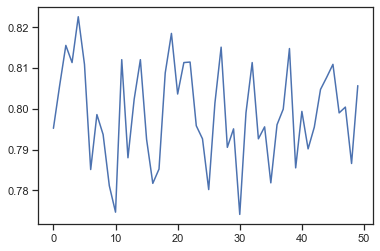

In [22]:
X = df_ml.drop(['Median_House_Value','Tot_Rooms','Households','Distance_to_SanDiego', 'Distance_to_SanFrancisco'], axis = 1)
Y = df_ml['Median_House_Value']

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

c = 0
lr_score_train = []
lr_score_val = []

for i in np.random.randint(200, size = 50):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = (1/9), random_state = i)

    pr = PolynomialFeatures(degree=3)
    lr = LinearRegression()

    x_train_pr = pr.fit_transform(x_train)

    x_val_pr = pr.fit_transform(x_val)

    lr.fit(x_train_pr, y_train)
    
    lr_score_train.append(lr.score(x_train_pr, y_train))
    lr_score_val.append(lr.score(x_val_pr, y_val))
    
    c += 1
    if c == 50:
        break
def avg(L):
    return sum(L) / len(L)
        
x_test_pr = PolynomialFeatures(degree=3).fit_transform(x_test)
    
print('Averge R^2 of the training set:', avg(lr_score_train))
print('Averge R^2 of the validation set:', avg(lr_score_val))
print('R^2 of the test set:', lr.score(x_test_pr, y_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lr.predict(x_test_pr))))
plt.plot(lr_score_val)
plt.show()

#### 2.4. Decision Tree Regressor 

In [30]:
X = df_ml.drop(['Median_House_Value','Tot_Rooms','Households','Distance_to_SanDiego', 'Distance_to_SanFrancisco'], axis = 1)
Y = df_ml['Median_House_Value']

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

c = 0
dtr_score_train = []
dtr_score_val = []

for i in np.random.randint(200, size = 50):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = (1/9), random_state = i)

    dtr_r = DecisionTreeRegressor()

    dtr_r.fit(x_train, y_train)
    
    dtr_score_train.append(dtr_r.score(x_train, y_train))
    dtr_score_val.append(dtr_r.score(x_val, y_val))
    
    c += 1
    if c == 50:
        break

def avg(L):
    return sum(L) / len(L)

print('Averge R^2 of the training set:', avg(dtr_score_train))
print('Averge R^2 of the validation set:', avg(dtr_score_val))
print('R^2 of the test set:', dtr_r.score(x_test, y_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, dtr_r.predict(x_test))))

Averge R^2 of the training set: 1.0
Averge R^2 of the validation set: 0.6840360640576714
R^2 of the test set: 0.6722653279746937
Root Mean Squared Error: 0.6077145406288296


#### 2.5. Random Forest

**Find optimal hyperparameters**

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = (1/9), random_state = 42)

X = df_ml.drop(['Median_House_Value','Tot_Rooms','Households','Distance_to_SanDiego', 'Distance_to_SanFrancisco'], axis = 1)
Y = df_ml['Median_House_Value']

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500, 750, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   6.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=750; total time=  26.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   6.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=  17.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   3.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   3.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   6.7s


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 500, 750, 1000]},
             verbose=2)

In [28]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 750}

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=  17.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   6.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=  10.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=750; total time=  25.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=  14.8s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   5.8s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   8.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=750; total time=  21.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   8.6s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=  14.4s
[CV] END bootstrap=True, max_depth=100, max_features=2, min

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=  10.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=750; total time=  26.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=  16.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=  34.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=  34.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=750; total time=  18.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=  12.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   6.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=  17.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   6.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=  10.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=750; total time=  25.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   6.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=  10.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=  35.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=  34.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=750; total time=  25.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=  16.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=  25.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=  10.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=  35.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=750; total time=  25.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=  16.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=  34.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=  25.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=  18.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   6.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=750; total time=  26.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=  10.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=  16.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   3.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   6.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=  10.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=  17.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=  34.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=  34.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=  33.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=  25.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  24.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sa

**Run the Random Forest Regressor Model**

In [37]:
X = df_ml.drop(['Median_House_Value','Tot_Rooms','Households','Distance_to_SanDiego', 'Distance_to_SanFrancisco'], axis = 1)
Y = df_ml['Median_House_Value']

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

c = 0
rfr_score_train = []
rfr_score_val = []
rfr_rmse = []

# for i in np.random.randint(200, size = 50):
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = (1/9), random_state = 42)

rf_r = RandomForestRegressor(n_estimators= 750, bootstrap = True,max_depth= 90, max_features = 3, min_samples_leaf = 3, min_samples_split = 8)

rf_r.fit(x_train, y_train)

rfr_score_train.append(rf_r.score(x_train, y_train))
rfr_score_val.append(rf_r.score(x_val, y_val))
    
#     c += 1
#     if c == 50:
#         break
def avg(L):
    return sum(L) / len(L)
        
print('Averge R^2 of the training set:', avg(rfr_score_train))
print('Averge R^2 of the validation set:', avg(rfr_score_val))
print('R^2 of the test set:', rf_r.score(x_test, y_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_r.predict(x_test))))

Averge R^2 of the training set: 0.9377072627132279
Averge R^2 of the validation set: 0.8318671687231751
R^2 of the test set: 0.8469401039671369
Root Mean Squared Error: 0.4254570124642047


#### 2.6. K Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsRegressor

X = df_ml.drop(['Median_House_Value','Tot_Rooms','Households','Distance_to_SanDiego', 'Distance_to_SanFrancisco'], axis = 1)
Y = df_ml['Median_House_Value']

c = 0
knn_score_train = []
knn_score_val = []
knn = KNeighborsRegressor(n_neighbors = 2)
#separate test set
x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

for i in np.random.randint(200, size = 50):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = (1/9), random_state = i)
    knn.fit(x_train, y_train)
    knn_score_train.append(knn.score(x_train, y_train))
    knn_score_val.append(knn.score(x_val, y_val))
    c += 1
    if c == 50:
        break
print('Averge R^2 of the training set:', np.mean(knn_score_train))
print('Averge R^2 of the validation set:', np.mean(knn_score_val))
print('R^2 of the test set:', knn.score(x_test,y_test))
print('Mean Squared Error', mean_squared_error(knn.predict(x_test), y_test))

Averge R^2 of the training set: 0.8923366548504468
Averge R^2 of the validation set: 0.648864890327893
R^2 of the test set: 0.6581416431719701
Mean Squared Error 0.4042929415684475


### 3. Model Selection

- <strong>Polynomial Features (degree = 3) with Ridge Regression:</strong><br>
Averge R^2 of the training set: 0.8465014984637953 <br>
Averge R^2 of the validation set: 0.8149581345490692<br>
R^2 of the test set: **0.8210436691156341**<br>
Root Mean Squared Error: **0.4649826958240986**<br>


- <strong>Polynomial Features (degree = 3) with Linear Regression</strong><br>
Averge R^2 of the training set: 0.8079840988109283<br>
Averge R^2 of the validation set: 0.7988901884995186<br>
R^2 of the test set: 0.801599585796968<br>
Root Mean Squared Error: 0.4851900497659086<br>


- <strong>Decision Tree</strong><br>
Averge R^2 of the training set: 1.0<br>
Averge R^2 of the validation set: 0.6840360640576714<br>
R^2 of the test set: 0.6722653279746937<br>
Root Mean Squared Error: 0.6077145406288296<br>


- <strong>Random Forest</strong><br>
Averge R^2 of the training set: 0.9774846925596712<br>
Averge R^2 of the validation set: 0.8380599564801464<br>
R^2 of the test set: **0.8392092184653608**<br>
Root Mean Squared Error: **0.4347412841104403**<br>


- <strong>K Nearest Neighbors</strong><br>
Averge R^2 of the training set: 0.8923366548504468<br>
Averge R^2 of the validation set: 0.648864890327893<br>
R^2 of the test set: 0.6581416431719701<br>
Mean Squared Error 0.4042929415684475

**[Conclusion]:** Random Forest and Ridge Regression are the two most suitable models, having the highest R^2 of the test set and low RMSE.

----

## <center>IV. Conclusion</center>

- There are houses/blocks worth investing. <br>
- Model can predict the house value relatively accurately.